In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('gapminder.csv', sep=';')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
data.year = data.year.astype(str)

In [4]:
print('Rows, columns:', data.shape)
print('\nData types:', data.dtypes, sep='\n')
print('\nNull values:', data.isnull().sum(), sep='\n')

Rows, columns: (3312, 6)

Data types:
country       object
continent     object
year          object
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

Null values:
country        0
continent    301
year           0
lifeExp        0
pop            0
gdpPercap      0
dtype: int64


Countries where continent is null

In [5]:
data.loc[data.continent.isnull(), 'country'].unique()

array(['Armenia', 'Aruba', 'Australia', 'Bahamas', 'Barbados', 'Belize',
       'Canada', 'French Guiana', 'French Polynesia', 'Georgia',
       'Grenada', 'Guadeloupe', 'Haiti', 'Hong Kong, China', 'Maldives',
       'Martinique', 'Micronesia, Fed. Sts.', 'Netherlands Antilles',
       'New Caledonia', 'Papua New Guinea', 'Reunion', 'Samoa',
       'Sao Tome and Principe', 'Tonga', 'Uzbekistan', 'Vanuatu'],
      dtype=object)

Values of continent in the data set.

In [6]:
data.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', nan, 'FSU', 'Oceania'],
      dtype=object)

In [7]:
data.loc[data.continent == 'FSU', 'country'].unique()

array(['Belarus', 'Kazakhstan', 'Latvia', 'Lithuania', 'Russia',
       'Ukraine'], dtype=object)

I guess FSU stands for 'former Soviet Union', which is not really a continent.

Year range of data

In [8]:
print(data.year.min(), '-', data.year.max())

1950 - 2007


A quick overview of GDP per capita per year per continent.
Unfortunately, the line for Africa is not showing.

I suspect the drops are years when there's no data collected. The plot shares the x axis and the data was not collected uniformly accross continents and years.

<Axes: xlabel='year'>

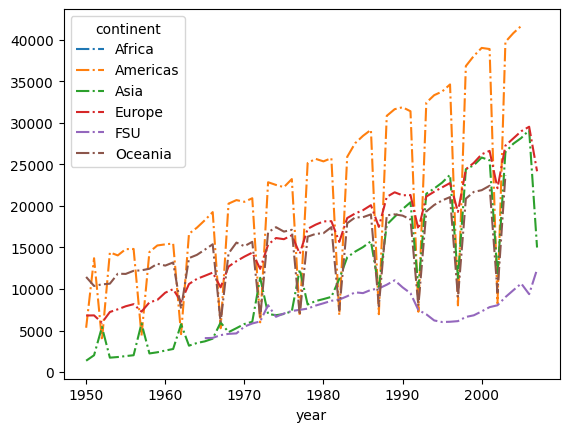

In [112]:
pd.pivot_table(
    data.loc[: , ['continent', 'year', 'gdpPercap']].groupby(['continent', 'year']).mean().reset_index(),
    index='year',
    columns='continent',
    values='gdpPercap'
).plot(subplots=False, linestyle='-.')

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

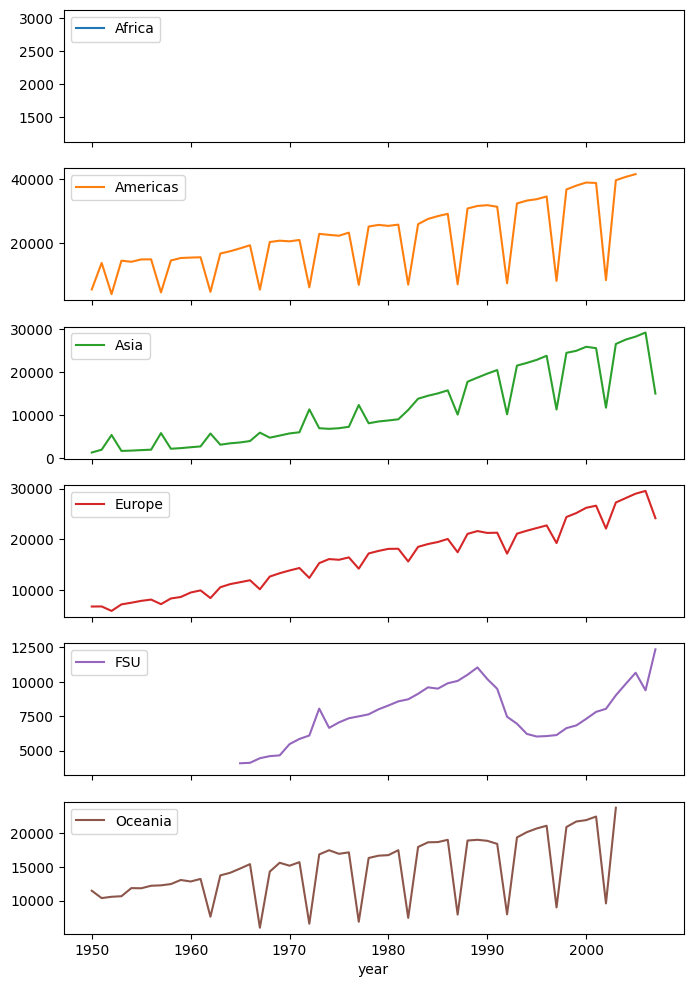

In [118]:
pd.pivot_table(
    data.loc[: , ['continent', 'year', 'gdpPercap']].groupby(['continent', 'year']).mean().reset_index(),
    index='year',
    columns='continent',
    values='gdpPercap'
).plot(subplots=True, figsize=(8, 12))

Text(0, 0.5, 'gdp')

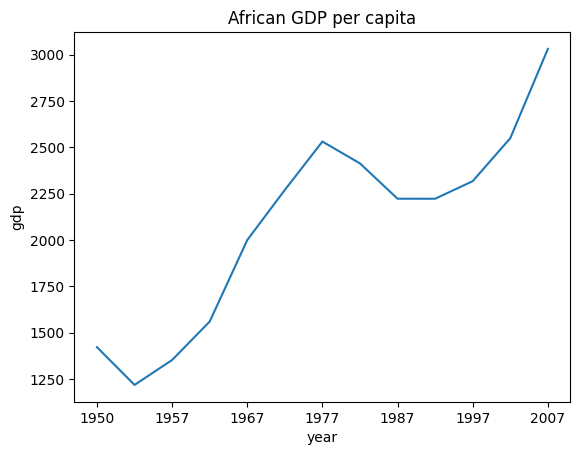

In [73]:
data.loc[data.continent == 'Africa', ['gdpPercap', 'year']].groupby('year').mean().plot(legend=None)
plt.title('African GDP per capita')
plt.ylabel('gdp')

GDP per year per continent

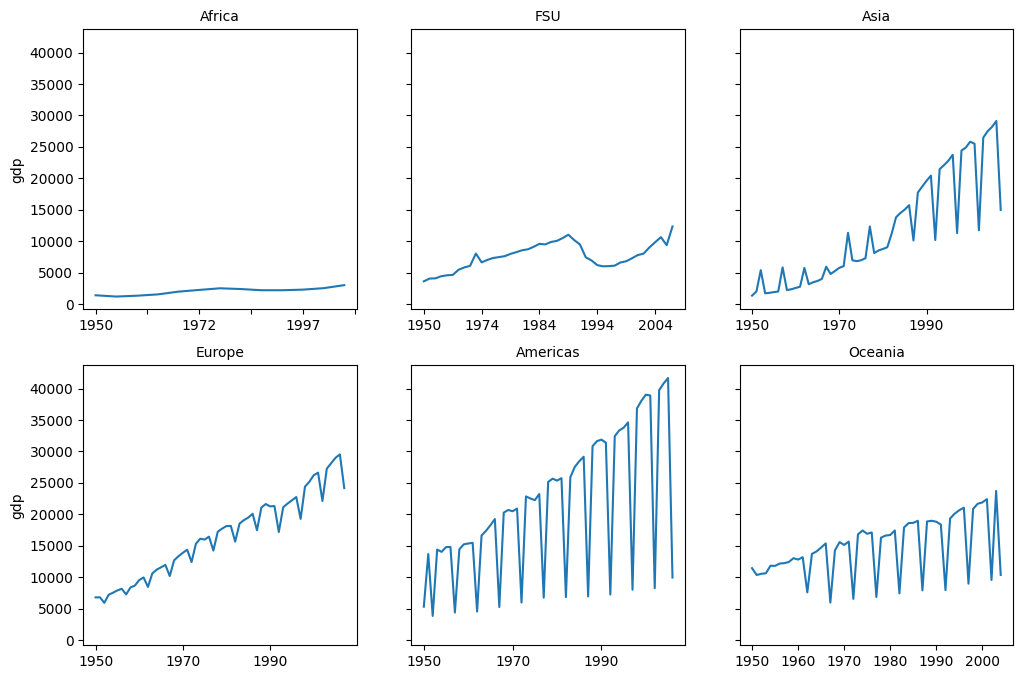

In [128]:
fig, ax = plt.subplots(2, 3, sharey=True, figsize=(12, 8))
for i, cont in enumerate(['Africa', 'Americas', 'Asia', 'Europe', 'FSU', 'Oceania']):
    row = i % 2
    col = i % 3
    data.loc[data.continent == cont, ['gdpPercap', 'year']].groupby('year').mean().plot(ax=ax[row, col], legend=None)
    ax[row, col].set_title(cont, size=10)
    ax[row, col].set_ylabel('gdp', size=10)
    ax[row, col].set_xlabel('')

Correlation between variables

In [131]:
data.groupby(['continent']).corr()

lifeExp       pop  gdpPercap
continent                                         
Africa    lifeExp    1.000000  0.149901   0.402496
          pop        0.149901  1.000000  -0.007947
          gdpPercap  0.402496 -0.007947   1.000000
Americas  lifeExp    1.000000  0.418583   0.564277
          pop        0.418583  1.000000   0.896683
          gdpPercap  0.564277  0.896683   1.000000
Asia      lifeExp    1.000000 -0.039848   0.443263
          pop       -0.039848  1.000000  -0.172214
          gdpPercap  0.443263 -0.172214   1.000000
Europe    lifeExp    1.000000  0.086162   0.768999
          pop        0.086162  1.000000  -0.013410
          gdpPercap  0.768999 -0.013410   1.000000
FSU       lifeExp    1.000000 -0.602228   0.327502
          pop       -0.602228  1.000000   0.121606
          gdpPercap  0.327502  0.121606   1.000000
Oceania   lifeExp    1.000000  0.949304   0.942371
          pop        0.949304  1.000000   0.995971
          gdpPercap  0.942371  0.995971   1.000000

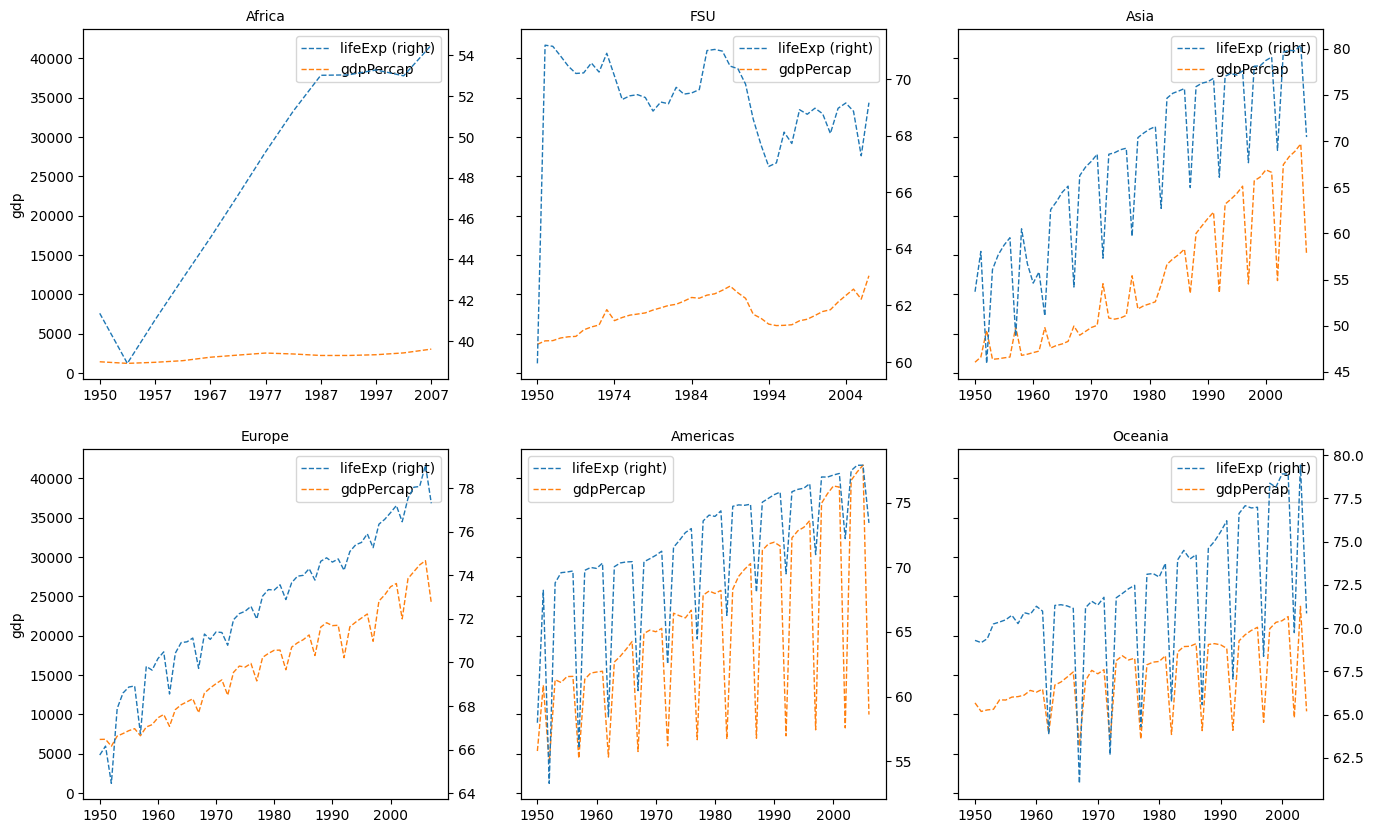

In [157]:
fig, ax = plt.subplots(2, 3, sharey=True, figsize=(16, 10))
for i, cont in enumerate(['Africa', 'Americas', 'Asia', 'Europe', 'FSU', 'Oceania']):
    row = i % 2
    col = i % 3
    (data.loc[data.continent == cont, ['lifeExp', 'gdpPercap', 'year']]
         .groupby('year')
         .mean()
         .plot(ax=ax[row, col], secondary_y=['lifeExp'], ls='--', lw=1))
    ax[row, col].set_title(cont, size=10)
    ax[row, col].set_ylabel('gdp', size=10)
    ax[row, col].set_xlabel('')


In [135]:
data.loc[data.continent == cont, ['lifeExp', 'gdpPercap', 'year']].groupby('year').mean()

,lifeExp,gdpPercap
year,,
1950,69.290000,11449.376300
1951,69.160000,10362.988100
1952,69.390000,10556.575660
1953,70.240000,10637.220080
1954,70.350000,11839.002840
1955,70.480000,11814.683000
1956,70.740000,12186.702760
1957,70.260000,12247.395320
1958,70.890000,12437.618420


In [136]:
cont

'Oceania'